In [66]:
import numpy as np
import torch
from torch import nn

In [67]:
class Burger(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.net=nn.Sequential(
            nn.Linear(2,32),
            nn.Tanh(),
            nn.Linear(32,32),
            nn.Tanh(),
            nn.Linear(32,32),
            nn.Tanh(),
            nn.Linear(32,32),
            nn.Tanh(),
            nn.Linear(32,32),
            nn.Tanh(),
            nn.Linear(32,32),
            nn.Linear(32,1)
        )
    def forward(self,x):
        return self.net(x)

In [68]:
def initial_seed(seed):
    torch.manual_seed(seed=seed)
    torch.backends.cudnn.deterministic=True
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed=seed)
initial_seed(10000)

In [69]:
def u_x():
    t=torch.zeros(1000,1)
    x=torch.rand(1000,1)
    cond= - torch.sin(torch.pi*x)
    return t.requires_grad_(True),x.requires_grad_(True),cond.requires_grad_(True)

def u_t1():
    t=torch.rand(1000,1)
    x= - torch.zeros(1000,1)
    cond=torch.zeros(1000,1)
    return t.requires_grad_(True),x.requires_grad_(True),cond.requires_grad_(True)

def u_t2():
    t=torch.rand(1000,1)
    x=torch.zeros(1000,1)
    cond=torch.zeros(1000,1)
    return t.requires_grad_(True),x.requires_grad_(True),cond.requires_grad_(True)

def inner():
    t=torch.rand(1000,1)
    x=torch.rand(1000,1)
    cond=torch.zeros(1000,1)
    return t.requires_grad_(True),x.requires_grad_(True),cond.requires_grad_(True)


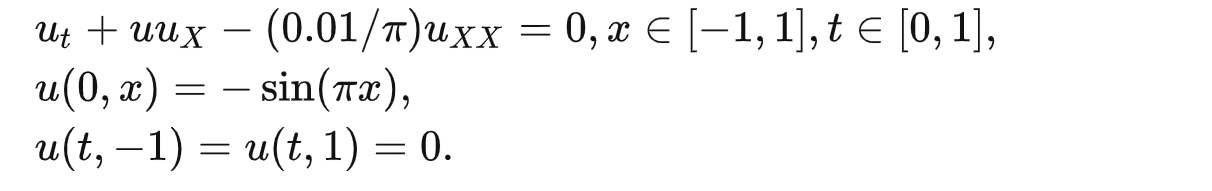

In [70]:
loss=nn.MSELoss()
def gradient(u,x,order=1):
    """compute deri"""
    if order==1:
        return torch.autograd.grad(u,x,grad_outputs=torch.ones_like(u),
            create_graph=True,only_inputs=True)
    else:
        return gradient(gradient(u,x,order=1),x,order=order-1)
    

In [71]:
def inner_loss(u):
    t,x,cond=inner()
    pred=u(torch.cat([t,x],dim=1))
    return loss(gradient(pred,t,order=1)+pred*gradient(pred,x,order=1)
        -gradient(pred,x,order=2)*(0.01/torch.pi),cond)

def u_x_loss(u):
    t,x,cond=u_x()
    pred=u(torch.cat([t,x],dim=1))
    return loss(pred,cond)

def u_t1_loss(u):
    t,x,cond=u_t1()
    pred=u(torch.cat([t,x],dim=1))
    return loss(pred,cond)

def u_t2_loss(u):
    t,x,cond=u_t2()
    pred=u(torch.cat([t,x],dim=1))
    return loss(pred,cond)

In [72]:
net=Burger()
optim=torch.optim.Adam(params=net.parameters())
for i in range(1000):
    optim.zero_grad()
    #losses=inner_loss(net)+u_x_loss(net)+u_t1_loss(net)+u_t2_loss(net)
    losses=u_x_loss(net)+u_t1_loss(net)+u_t2_loss(net)
    losses.backward()
    optim.step()
    if i%100==0:
        print("Training Epoches: ",i,"\nLoss: ",torch.mean(losses))


Training Epoches:  0 
Loss:  tensor(0.6015, grad_fn=<MeanBackward0>)
Training Epoches:  100 
Loss:  tensor(0.1168, grad_fn=<MeanBackward0>)
Training Epoches:  200 
Loss:  tensor(0.0051, grad_fn=<MeanBackward0>)
Training Epoches:  300 
Loss:  tensor(0.0015, grad_fn=<MeanBackward0>)
Training Epoches:  400 
Loss:  tensor(0.0007, grad_fn=<MeanBackward0>)
Training Epoches:  500 
Loss:  tensor(0.0003, grad_fn=<MeanBackward0>)
Training Epoches:  600 
Loss:  tensor(0.0001, grad_fn=<MeanBackward0>)
Training Epoches:  700 
Loss:  tensor(0.0005, grad_fn=<MeanBackward0>)
Training Epoches:  800 
Loss:  tensor(3.0697e-05, grad_fn=<MeanBackward0>)
Training Epoches:  900 
Loss:  tensor(5.6982e-05, grad_fn=<MeanBackward0>)


In [83]:
u=net
t,x,cond=inner()
pred=u(torch.cat([t,x],dim=1))
#loss(gradient(pred,t,order=1)+pred*gradient(pred,x,order=1)-gradient(pred,x,order=2)*(0.01/torch.pi),cond)
print(torch)

(tensor([[ 3.7377e-01],
        [-3.8216e-01],
        [-5.2374e-01],
        [-4.2670e-02],
        [-8.9034e-01],
        [-4.0760e-01],
        [-6.1133e-01],
        [ 2.5707e-02],
        [-9.2711e-01],
        [ 7.3533e-02],
        [ 1.3650e-01],
        [-4.0548e-01],
        [ 3.9466e-02],
        [ 1.7179e-01],
        [-9.1436e-01],
        [-8.7494e-01],
        [-4.7411e-01],
        [-5.8679e-01],
        [ 5.0628e-02],
        [-2.6935e-01],
        [ 4.8954e-02],
        [ 4.7677e-02],
        [-3.3288e-01],
        [-9.3364e-01],
        [-6.2179e-01],
        [ 2.2359e-02],
        [-6.3158e-01],
        [ 5.4904e-02],
        [-1.8743e-01],
        [ 3.6101e-02],
        [-2.4606e-02],
        [-3.0186e-01],
        [ 5.9414e-02],
        [-5.4652e-01],
        [ 3.7395e-02],
        [ 4.5746e-02],
        [ 6.7437e-02],
        [-8.9565e-01],
        [-2.0268e-02],
        [-1.7433e-02],
        [-2.7729e-01],
        [ 6.7319e-04],
        [ 2.7221e-01],
        [ 